<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/CNN_with_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [2]:
(train_images, train_labels), (test_images, test_labels) = load_data()

170508288/170498071 [==============================] - 3s 0us/step


## Getting to know the data

In [3]:
train_images.shape # All the images are in the shape (32, 32, 3)

(50000, 32, 32, 3)

In [4]:
train_labels.shape

(50000, 1)

[9]


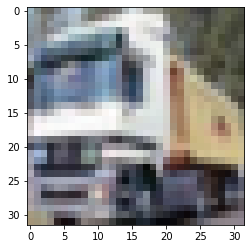

In [5]:
plt.imshow(train_images[1])
print(train_labels[1])

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Preprocessing

In [11]:
# Standardizing
train_images = train_images/255
test_images = test_images/255

In [12]:
# Turning the labels into categorical
train_labels_cat = to_categorical(train_labels, num_classes = 10)

test_labels_copy = test_labels.copy()

test_labels_cat = to_categorical(test_labels_copy, num_classes = 10)

In [13]:
train_labels_cat.shape, test_labels_cat.shape

((50000, 10), (10000, 10))

## Model

In [36]:
input = Input((32,32,3))

conv2d = Conv2D(64, (3,3), activation = 'relu')

# Convolutional Layers
x = conv2d(input)
x = MaxPool2D((2,2)) (x)
x = Dropout(0.3) (x)
x = Conv2D(32, (2,2), activation = 'relu') (x)
x = Flatten() (x)

# Dense
x = Dense(32, activation = 'relu') (x)

output = Dense(10, activation = 'softmax') (x)

model = Model(input, output, name = 'cifar_10_model')

In [37]:
model.summary()

Model: "cifar_10_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                    

In [38]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [39]:
# Callbacks
# Early Stopping
es_callback = EarlyStopping(monitor = 'loss', min_delta = 0.3, patience = 3)

# Learning Rate Scheduler 
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lrs_callback = LearningRateScheduler(scheduler)

In [40]:
r = model.fit(train_images, train_labels_cat, validation_data = (test_images, test_labels_cat), epochs = 50, callbacks = [es_callback, lrs_callback])

Epoch 1/50
1563/1563 [==============================] - 130s 83ms/step - loss: 1.5754 - accuracy: 0.4328 - val_loss: 1.3042 - val_accuracy: 0.5430 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 114s 73ms/step - loss: 1.2034 - accuracy: 0.5768 - val_loss: 1.1652 - val_accuracy: 0.5858 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 117s 75ms/step - loss: 1.0574 - accuracy: 0.6311 - val_loss: 1.1181 - val_accuracy: 0.6127 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9682 - accuracy: 0.6639 - val_loss: 1.0083 - val_accuracy: 0.6489 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 99s 64ms/step - loss: 0.9079 - accuracy: 0.6845 - val_loss: 0.9492 - val_accuracy: 0.6735 - lr: 0.0010


## After Model

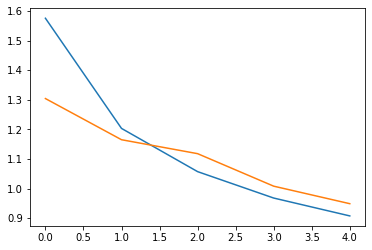

In [42]:
# Loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

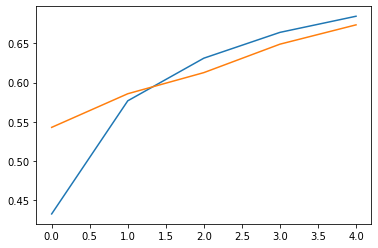

In [43]:
# Accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')

In [44]:
model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 4s 12ms/step - loss: 0.9492 - accuracy: 0.6735


[0.9491786360740662, 0.6735000014305115]

In [45]:
preds = model.predict(test_images)

In [48]:
preds_ncat = []

for i in range(len(preds)):
  argmax = preds[i].argmax()
  preds_ncat.append(argmax)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, preds_ncat))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1000
           1       0.73      0.85      0.79      1000
           2       0.55      0.53      0.54      1000
           3       0.54      0.45      0.49      1000
           4       0.64      0.58      0.61      1000
           5       0.53      0.70      0.60      1000
           6       0.80      0.69      0.74      1000
           7       0.69      0.77      0.72      1000
           8       0.78      0.77      0.78      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



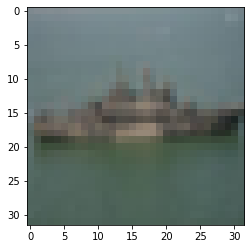

Predicted: ship
Actual: ship


In [59]:
import random
i = random.randint(0, 10001)

plt.imshow(np.reshape(test_images[i], (32, 32, 3)), cmap = 'gray')
plt.show()

print(f"Predicted: {classes[preds[i].argmax()]}")
print(f"Actual: {classes[test_labels_cat[i].argmax()]}")

In [60]:
# Saving and loading model
model.save('cifar_10_model')
new_model = load_model('cifar_10_model')

INFO:tensorflow:Assets written to: cifar_10_model/assets


In [66]:
new_preds = new_model.predict(test_images)

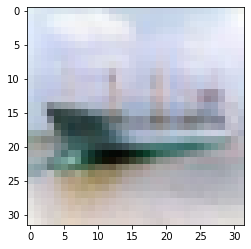

Predicted: ship
Actual: ship


In [67]:
import random
i = random.randint(0, 10001)

plt.imshow(np.reshape(test_images[i], (32, 32, 3)), cmap = 'gray')
plt.show()

print(f"Predicted: {classes[new_preds[i].argmax()]}")
print(f"Actual: {classes[test_labels_cat[i].argmax()]}")